<a href="https://colab.research.google.com/github/DeQuayM5/Food-Sales-Predictions-2-/blob/main/FoodSalesPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filename ='/content/drive/MyDrive/sales_predictions.csv'

In [4]:
fsp_df = pd.read_csv(filename)
fsp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# How many rows and columns in the data
fsp_df.shape

(8523, 12)

In [6]:
# the datatypes of each variable
fsp_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# checking for any duplicates, drop if so.
fsp_df.duplicated().any()

False

In [8]:
# Identifying missing values
fsp_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Addressing the missing values.
# Confirm that there are no missing values after addressing them.
fsp_df.drop(columns = ['Item_Weight'], inplace = True)
fsp_df['Outlet_Size'].fillna('None', inplace = True)

In [10]:
# Confirming that there are no missing values.
fsp_df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
# finding and fixing any inconsistent categories of data
fsp_df['Item_Fat_Content'] = fsp_df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
fsp_df['Item_Fat_Content'] = fsp_df['Item_Fat_Content'].replace(['reg'], 'Regular')

In [12]:
# finding and fixing any inconsistent categories of data
fsp_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
# finding and fixing any inconsistent categories of data
fsp_df['Outlet_Size'].value_counts()

Medium    2793
None      2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
# finding and fixing any inconsistent categories of data
fsp_df['Outlet_Size'] = fsp_df['Outlet_Size'].replace(['High'], 'Large')
fsp_df['Outlet_Size'].value_counts()

Medium    2793
None      2410
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

In [15]:
# Obtaining the summary statistics for any numerical column. (min, max, mean)
fsp_df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


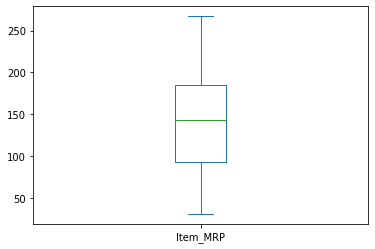

In [16]:
# boxplot of item mrp
fsp_df['Item_MRP'].plot(kind = 'box');

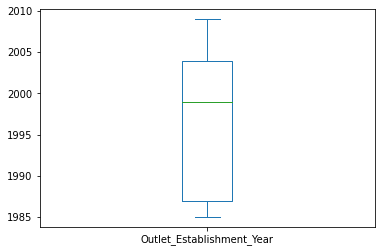

In [17]:
# boxplot of outlet establishment year
fsp_df['Outlet_Establishment_Year'].plot(kind = 'box')

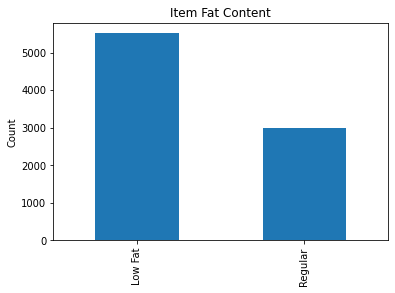

In [18]:
# bar graph of item fat content
if_content = fsp_df['Item_Fat_Content'].value_counts()
if_content.plot(kind = 'bar')
plt.title('Item Fat Content')
plt.ylabel('Count');

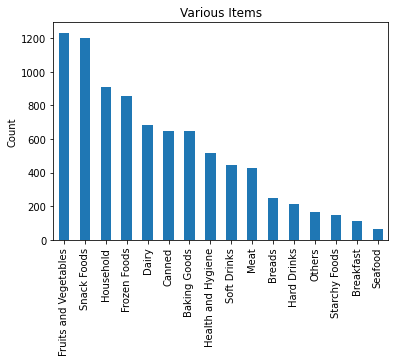

In [19]:
# bar graph of item type
item_type = fsp_df['Item_Type'].value_counts()
item_type.plot(kind = 'bar')
plt.title('Various Items')
plt.ylabel('Count');

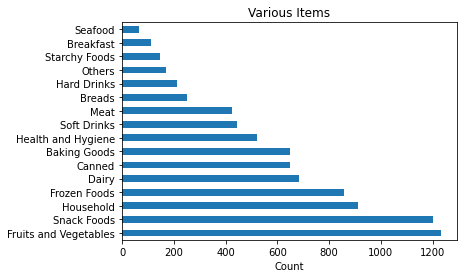

In [20]:
# horizontal bar graph of item type
item_type = fsp_df['Item_Type'].value_counts()
item_type.plot(kind = 'barh')
plt.title('Various Items')
plt.xlabel('Count');

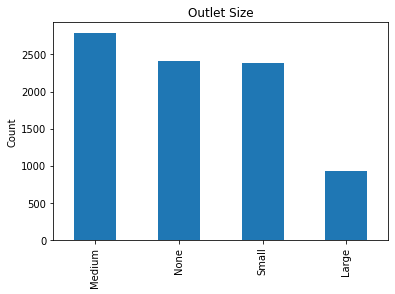

In [21]:
# bar graph of outlet size 
outlet_size = fsp_df['Outlet_Size'].value_counts()
outlet_size.plot(kind = 'bar')
plt.title('Outlet Size')
plt.ylabel('Count');

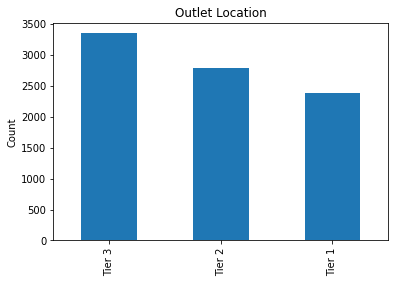

In [22]:
# bar graph of outlet location type
outlet_location = fsp_df['Outlet_Location_Type'].value_counts()
outlet_location.plot(kind = 'bar')
plt.title('Outlet Location')
plt.ylabel('Count');

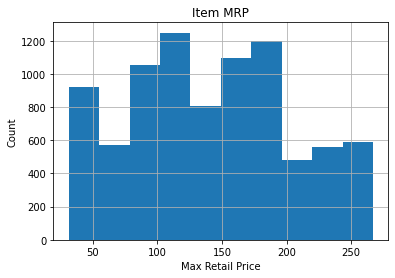

In [23]:
# histogram of item mrp
fsp_df['Item_MRP'].hist()
plt.title('Item MRP')
plt.xlabel('Max Retail Price')
plt.ylabel('Count');

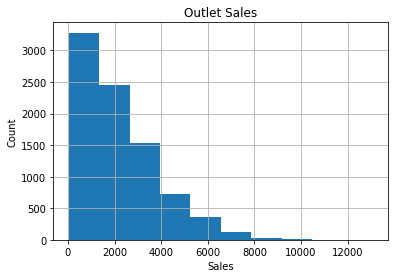

In [24]:
# histogram of the outlet sales
fsp_df['Item_Outlet_Sales'].hist()
plt.title('Outlet Sales')
plt.xlabel('Sales')
plt.ylabel('Count');

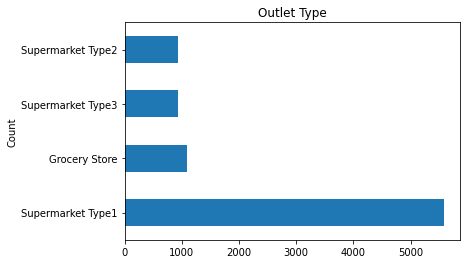

In [25]:
# horizontal bar graph for outlet type
outlet_type = fsp_df['Outlet_Type'].value_counts()
outlet_type.plot(kind = 'barh')
plt.title('Outlet Type')
plt.ylabel('Count');

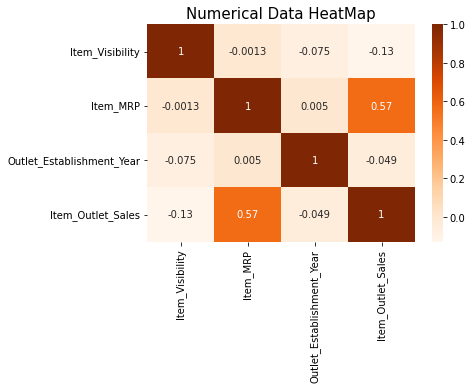

In [26]:
# Heatmap of all athe numerical data 
fsp_corr = fsp_df.corr()
sns.heatmap(data = fsp_corr , cmap = 'Oranges', annot = True)
plt.title('Numerical Data HeatMap', fontsize = 15);

In this scatterplot we see the relationship between Outlet Sales and MRP by Outlet Types. This gives us the best representation of the correlation between the data. The sales an item brings in tends to have a higher MRP of said item, so the higher the MRP of an item, the more sales that item will bring in. And regardless of MRP, Grocery stores tend to see lower sales when compared to Supermarket Types.

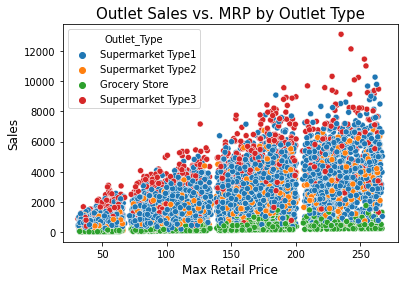

In [27]:
# Scatterplot of the correlating relationship between Outlet Sales and Item MRP by the Type of Outlet
sns.scatterplot(data = fsp_df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Type')
plt.title('Outlet Sales vs. MRP by Outlet Type', fontsize = 15)
plt.xlabel('Max Retail Price', fontsize = 12)
plt.ylabel('Sales', fontsize = 12)
plt.savefig('type_sales.png');

In this graph you can see that item visibility doesn't equal higher amount of sales, it shows the opposite actually but we would need more data to make an accurate assessment of the correlation of the visibility of an item and its sales. 

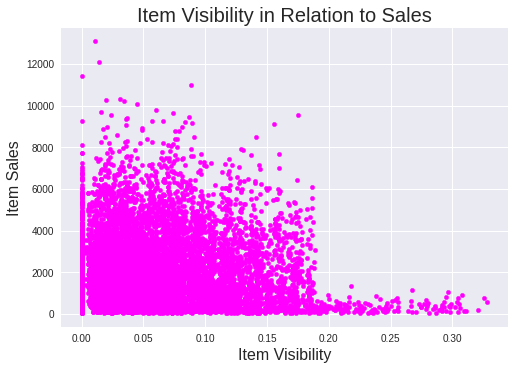

In [40]:
plt.style.use('seaborn')
fsp_df.plot.scatter(x = 'Item_Visibility', y = 'Item_Outlet_Sales', color = 'magenta' )
plt.xlabel('Item Visibility', fontsize = 16)
plt.ylabel('Item Sales', fontsize = 16)
plt.title('Item Visibility in Relation to Sales', fontsize = 20)
plt.savefig('visibility.png');

Despite eating healthy being a big, low fat content still tends to sell less than content with regular fat but you can see that low fat items are too far behind when it comes to sales.

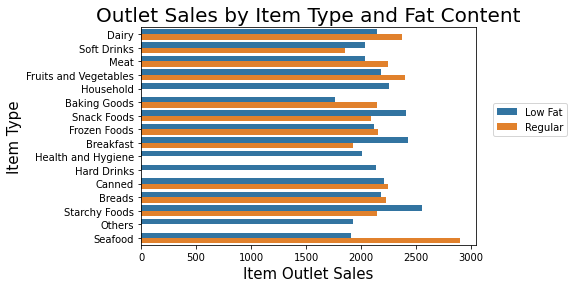

In [32]:
sns.barplot(data = fsp_df, x = 'Item_Outlet_Sales', y = 'Item_Type', hue = 'Item_Fat_Content', ci = None)
plt.legend(loc = (1.05, 0.5))
plt.title('Outlet Sales by Item Type and Fat Content', fontsize = 20)
plt.ylabel('Item Type', fontsize = 15)
plt.xlabel('Item Outlet Sales', fontsize = 15);